In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [2]:
df=pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD002.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [3]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


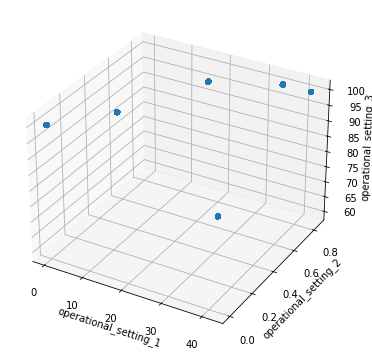

In [4]:
from mpl_toolkits.mplot3d import Axes3D
op1=df.iloc[:,2]
op2=df.iloc[:,3]
op3=df.iloc[:,4]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(op1, op2, op3)
ax.set_xlabel('operational_setting_1')
ax.set_ylabel('operational_setting_2')
ax.set_zlabel('operational_setting_3')
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.tick_params(axis='z', pad=8)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'op3')

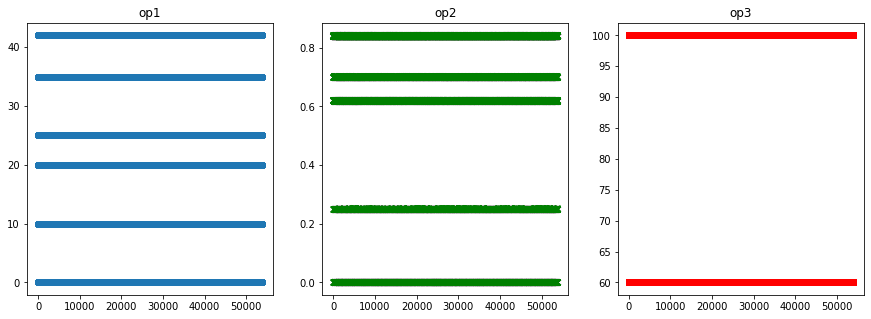

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df.index, df['op1'], marker='o', label='op1')
axs[0].set_title('op1')
axs[1].scatter(df.index, df['op2'], marker='x', label='op2', color='g')
axs[1].set_title('op2')
axs[2].scatter(df.index, df['op3'], marker='s', label='op3', color='r')
axs[2].set_title('op3')

In [6]:
# type1: op1 in [0,1], op2 in [0,1], op3 in [99,100]
# type2: op1 in [9,11], op2 in [0.2,0.3], op3 in [99, 100]
# type3: op1 in [19,21], op2 in [0.65, 0.75], op3 in [99, 100]
# type4: op1 in [24, 26], op2 in [0.6, 0.63], op3 in [59, 61]
# type5: op1 in [30, 40], op2 >=0.8, op3 in [99, 100]
# type6: op1 >=40, op2>=0.8, op3 in [99, 100]
df_ops=df[['op1','op2','op3']]
conditions = [
    (df['op1'].between(0, 1)) & (df['op2'].between(0, 1)) & (df['op3'].between(99, 100)),  # type1
    (df['op1'].between(9, 11)) & (df['op2'].between(0.2, 0.3)) & (df['op3'].between(99, 100)),  # type2
    (df['op1'].between(19, 21)) & (df['op2'].between(0.65, 0.75)) & (df['op3'].between(99, 100)),  # type3
    (df['op1'].between(24, 26)) & (df['op2'].between(0.6, 0.63)) & (df['op3'].between(59, 61)),  # type4
    (df['op1'].between(30, 40)) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100)),  # type5
    (df['op1'] >= 40) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops['type'] = np.select(conditions, type_labels, default='undefined')
df_ops

C:\Users\owner\AppData\Local\Temp\ipykernel_68568\294332328.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,34.9983,0.8400,100.0,type5
1,41.9982,0.8408,100.0,type6
2,24.9988,0.6218,60.0,type4
3,42.0077,0.8416,100.0,type6
4,25.0005,0.6203,60.0,type4
...,...,...,...,...
53754,20.0037,0.7000,100.0,type3
53755,10.0022,0.2510,100.0,type2
53756,25.0041,0.6200,60.0,type4
53757,25.0033,0.6220,60.0,type4


In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_ops=ohe.fit_transform(df_ops[['type']])
X_ops

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [8]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops = pd.DataFrame(X_ops, columns=column_names)
df_ops

,type1,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
53754,0.0,0.0,1.0,0.0,0.0,0.0
53755,0.0,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# Prevent multicollinearity
df_ops=df_ops.iloc[:,1:]
df_ops

,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
53754,0.0,1.0,0.0,0.0,0.0
53755,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,1.0,0.0,0.0


In [10]:
df=pd.concat([df, df_ops], axis=1)
df

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr20,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,14.73,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,10.41,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,14.08,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,10.59,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,14.13,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,24.36,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,28.10,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,14.19,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,14.05,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0


In [11]:
window_size = 30

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_df

Rolling: 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0,"(1, 30)"
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0,"(1, 30)"
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0,"(1, 30)"
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0,"(1, 30)"
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379935,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0,"(260, 316)"
1379936,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0,"(260, 316)"
1379937,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0,"(260, 316)"
1379938,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0,"(260, 316)"


In [12]:
selected_cols=['id','type2','type3','type4','type5','type6','sr2', 'sr3', 'sr4',
                    'sr7', 'sr8', 'sr9', 'sr11',
                    'sr12', 'sr13', 'sr14', 'sr15',
                    'sr17', 'sr20', 'sr21']

In [13]:
selected_df=rolled_df[selected_cols]
selected_df

,id,type2,type3,type4,type5,type6,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 30)",0.0,0.0,0.0,1.0,0.0,555.32,1358.61,1137.23,194.64,2222.65,8341.91,42.02,183.06,2387.72,8048.56,9.3461,334,14.73,8.8071
1,"(1, 30)",0.0,0.0,0.0,0.0,1.0,549.90,1353.22,1125.78,138.51,2211.57,8303.96,42.20,130.42,2387.66,8072.30,9.3774,330,10.41,6.2665
2,"(1, 30)",0.0,0.0,1.0,0.0,0.0,537.31,1256.76,1047.45,175.71,1915.11,8001.42,36.69,164.22,2028.03,7864.87,10.8941,309,14.08,8.6723
3,"(1, 30)",0.0,0.0,0.0,0.0,1.0,549.51,1354.03,1126.38,138.46,2211.58,8303.96,41.96,130.72,2387.61,8068.66,9.3528,329,10.59,6.4701
4,"(1, 30)",0.0,0.0,1.0,0.0,0.0,537.07,1257.71,1047.93,175.05,1915.10,7993.23,36.89,164.31,2028.00,7861.23,10.8963,309,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379935,"(260, 316)",0.0,1.0,0.0,0.0,0.0,608.79,1495.60,1269.51,334.00,2324.92,8852.27,44.72,314.05,2389.02,8169.64,9.3035,369,24.36,14.5189
1379936,"(260, 316)",1.0,0.0,0.0,0.0,0.0,605.81,1514.32,1324.12,392.46,2319.17,8915.86,46.08,371.22,2388.42,8245.36,8.7586,374,28.10,16.9454
1379937,"(260, 316)",0.0,0.0,1.0,0.0,0.0,537.48,1276.24,1057.92,175.11,1917.37,8114.33,37.14,163.74,2030.33,7971.25,11.0657,310,14.19,8.5503
1379938,"(260, 316)",0.0,0.0,1.0,0.0,0.0,537.84,1272.95,1066.30,174.81,1917.36,8112.63,37.32,164.37,2030.35,7972.47,11.0537,311,14.05,8.3729


In [14]:
X=extract_features(
    selected_df,
    column_id='id',
    impute_function=impute
)
X

Feature Extraction: 100%|██████████| 60/60 [56:06<00:00, 56.11s/it]   


type2__variance_larger_than_standard_deviation  \
1   30                                              0.0   
    31                                              0.0   
    32                                              0.0   
    33                                              0.0   
    34                                              0.0   
...                                                 ...   
260 312                                             0.0   
    313                                             0.0   
    314                                             0.0   
    315                                             0.0   
    316                                             0.0   

         type2__has_duplicate_max  type2__has_duplicate_min  \
1   30                        0.0                       1.0   
    31                        1.0                       1.0   
    32                        1.0                       1.0   
    33                        1.0                       1.0   
    34                        1.0                       1.0   
...                           ...                       ...   
260 312                       1.0                       1.0   
    313                       1.0                       1.0   
    314                       1.0                       1.0   
    315                       1.0                       1.0   
    316                       1.0                       1.0   

         type2__has_duplicate  type2__sum_values  type2__abs_energy  \
1   30                    1.0                1.0                1.0   
    31                    1.0                2.0                2.0   
    32                    1.0                3.0                3.0   
    33                    1.0                3.0                3.0   
    34                    1.0                3.0                3.0   
...                       ...                ...                ...   
260 312                   1.0                3.0                3.0   
    313                   1.0                4.0                4.0   
    314                   1.0                4.0                4.0   
    315                   1.0                4.0                4.0   
    316                   1.0                4.0                4.0   

         type2__mean_abs_change  type2__mean_change  \
1   30                 0.068966            0.000000   
    31                 0.103448            0.034483   
    32                 0.103448            0.034483   
    33                 0.137931            0.000000   
    34                 0.137931            0.000000   
...                         ...                 ...   
260 312                0.206897            0.000000   
    313                0.241379            0.034483   
    314                0.275862            0.000000   
    315                0.275862            0.000000   
    316                0.275862            0.000000   

         type2__mean_second_derivative_central  type2__median  ...  \
1   30                                0.000000            0.0  ...   
    31                                0.017857            0.0  ...   
    32                                0.000000            0.0  ...   
    33                               -0.017857            0.0  ...   
    34                                0.000000            0.0  ...   
...                                        ...            ...  ...   
260 312                               0.000000            0.0  ...   
    313                               0.017857            0.0  ...   
    314                              -0.017857            0.0  ...   
    315                               0.000000            0.0  ...   
    316                               0.000000            0.0  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   30                        1.515413                        1.873452   
    31                        1.515413  

In [15]:
y=rolled_df.groupby('id')['label'].last()

In [16]:
X_filtered=select_features(X, y)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)

# Convert the scaled data back to a DataFrame if needed
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

# Display the scaled DataFrame
relevant_features_scaled_df.head()

,sr15__maximum,sr15__absolute_maximum,sr11__absolute_maximum,sr11__maximum,sr17__absolute_maximum,sr17__maximum,sr4__absolute_maximum,sr4__maximum,sr4__quantile__q_0.4,sr2__absolute_maximum,...,sr11__has_duplicate_max,sr11__symmetry_looking__r_0.2,type6__number_peaks__n_10,sr2__symmetry_looking__r_0.05,sr15__variance_larger_than_standard_deviation,"type4__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""",sr14__index_mass_quantile__q_0.1,sr3__has_duplicate_max,sr4__has_duplicate_max,sr4__has_duplicate
0,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.380212,0.112199,...,-0.207053,0.0395,-0.087603,-0.35601,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062
1,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.380212,0.112199,...,-0.207053,0.0395,-0.087603,-0.35601,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062
2,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.367146,0.112199,...,-0.207053,0.0395,-0.087603,-0.35601,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062
3,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.362629,0.142095,...,-0.207053,0.0395,-0.087603,-0.35601,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062
4,-0.092524,-0.092524,0.124767,0.124767,-0.371316,-0.371316,0.35439,0.35439,-0.355047,0.142095,...,-0.207053,0.0395,-0.087603,-0.35601,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062


In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [19]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
rmse

8.835719467767204

In [34]:
test=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD001.txt', delim_whitespace=True, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [35]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
test.columns=columns
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [36]:
test_ops=test[['op1','op2','op3']]
conditions = [
    (test['op1'].between(0, 1)) & (test['op2'].between(0, 1)) & (test['op3'].between(99, 100)),  # type1
    (test['op1'].between(9, 11)) & (test['op2'].between(0.2, 0.3)) & (test['op3'].between(99, 100)),  # type2
    (test['op1'].between(19, 21)) & (test['op2'].between(0.65, 0.75)) & (test['op3'].between(99, 100)),  # type3
    (test['op1'].between(24, 26)) & (test['op2'].between(0.6, 0.63)) & (test['op3'].between(59, 61)),  # type4
    (test['op1'].between(30, 40)) & (test['op2'] >= 0.8) & (test['op3'].between(99, 100)),  # type5
    (test['op1'] >= 40) & (test['op2'] >= 0.8) & (test['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
test_ops['type'] = np.select(conditions, type_labels, default='undefined')
test_ops

C:\Users\owner\AppData\Local\Temp\ipykernel_68568\2908830509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,0.0023,0.0003,100.0,type1
1,-0.0027,-0.0003,100.0,undefined
2,0.0003,0.0001,100.0,type1
3,0.0042,0.0000,100.0,type1
4,0.0014,0.0000,100.0,type1
...,...,...,...,...
13091,0.0049,0.0000,100.0,type1
13092,-0.0011,-0.0001,100.0,undefined
13093,-0.0006,-0.0003,100.0,undefined
13094,-0.0038,0.0001,100.0,undefined


In [37]:
test_ops=ohe.transform(test_ops[['type']])
test_ops

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [38]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
test_ops = pd.DataFrame(test_ops, columns=column_names)
test_ops

,type1,type2,type3,type4,type5,type6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
13091,1.0,0.0,0.0,0.0,0.0,0.0
13092,0.0,0.0,0.0,0.0,0.0,0.0
13093,0.0,0.0,0.0,0.0,0.0,0.0
13094,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
test_ops=test_ops.iloc[:,1:]

test=pd.concat([test, test_ops], axis=1)
test

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr17,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,392,2388,100.0,38.86,23.3735,0.0,0.0,0.0,0.0,0.0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,393,2388,100.0,39.02,23.3916,0.0,0.0,0.0,0.0,0.0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,393,2388,100.0,39.08,23.4166,0.0,0.0,0.0,0.0,0.0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,391,2388,100.0,39.00,23.3737,0.0,0.0,0.0,0.0,0.0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,390,2388,100.0,38.99,23.4130,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,394,2388,100.0,38.65,23.1974,0.0,0.0,0.0,0.0,0.0
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,395,2388,100.0,38.57,23.2771,0.0,0.0,0.0,0.0,0.0
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,395,2388,100.0,38.62,23.2051,0.0,0.0,0.0,0.0,0.0
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,395,2388,100.0,38.66,23.2699,0.0,0.0,0.0,0.0,0.0


In [40]:
window_size = 30

rolled_test = roll_time_series(
    test,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_test

Rolling: 100%|██████████| 51/51 [00:11<00:00,  4.38it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6,id
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388,100.0,38.86,23.3735,0.0,0.0,0.0,0.0,0.0,"(1, 30)"
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388,100.0,39.02,23.3916,0.0,0.0,0.0,0.0,0.0,"(1, 30)"
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388,100.0,39.08,23.4166,0.0,0.0,0.0,0.0,0.0,"(1, 30)"
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388,100.0,39.00,23.3737,0.0,0.0,0.0,0.0,0.0,"(1, 30)"
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388,100.0,38.99,23.4130,0.0,0.0,0.0,0.0,0.0,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297865,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388,100.0,38.65,23.1974,0.0,0.0,0.0,0.0,0.0,"(100, 198)"
297866,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388,100.0,38.57,23.2771,0.0,0.0,0.0,0.0,0.0,"(100, 198)"
297867,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388,100.0,38.62,23.2051,0.0,0.0,0.0,0.0,0.0,"(100, 198)"
297868,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388,100.0,38.66,23.2699,0.0,0.0,0.0,0.0,0.0,"(100, 198)"


In [41]:
selected_test=rolled_test[selected_cols]
selected_test

,id,type2,type3,type4,type5,type6,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 30)",0.0,0.0,0.0,0.0,0.0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,"(1, 30)",0.0,0.0,0.0,0.0,0.0,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,"(1, 30)",0.0,0.0,0.0,0.0,0.0,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,"(1, 30)",0.0,0.0,0.0,0.0,0.0,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,"(1, 30)",0.0,0.0,0.0,0.0,0.0,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297865,"(100, 198)",0.0,0.0,0.0,0.0,0.0,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
297866,"(100, 198)",0.0,0.0,0.0,0.0,0.0,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
297867,"(100, 198)",0.0,0.0,0.0,0.0,0.0,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
297868,"(100, 198)",0.0,0.0,0.0,0.0,0.0,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [42]:
x_test=extract_features(
    selected_test,
    column_id='id',
    impute_function=impute
)
x_test

Feature Extraction: 100%|██████████| 60/60 [09:09<00:00,  9.15s/it]  


sr21__variance_larger_than_standard_deviation  \
1   30                                             0.0   
    31                                             0.0   
2   30                                             0.0   
    31                                             0.0   
    32                                             0.0   
...                                                ...   
100 194                                            0.0   
    195                                            0.0   
    196                                            0.0   
    197                                            0.0   
    198                                            0.0   

         sr21__has_duplicate_max  sr21__has_duplicate_min  \
1   30                       0.0                      0.0   
    31                       0.0                      0.0   
2   30                       0.0                      0.0   
    31                       0.0                      0.0   
    32                       0.0                      0.0   
...                          ...                      ...   
100 194                      0.0                      0.0   
    195                      0.0                      0.0   
    196                      0.0                      0.0   
    197                      0.0                      0.0   
    198                      0.0                      0.0   

         sr21__has_duplicate  sr21__sum_values  sr21__abs_energy  \
1   30                   0.0          701.3968      16398.618229   
    31                   0.0          701.3785      16397.763094   
2   30                   0.0          699.7772      16323.083308   
    31                   0.0          699.6914      16319.076551   
    32                   0.0          699.7151      16320.181068   
...                      ...               ...               ...   
100 194                  1.0          698.6181      16269.031663   
    195                  1.0          698.6682      16271.361518   
    196                  1.0          698.5251      16264.699741   
    197                  1.0          698.4462      16261.021525   
    198                  1.0          698.3093      16254.654594   

         sr21__mean_abs_change  sr21__mean_change  \
1   30                0.048745           0.001152   
    31                0.049903          -0.001255   
2   30                0.084100          -0.003017   
    31                0.080638           0.000562   
    32                0.076886          -0.003190   
...                        ...                ...   
100 194               0.072255          -0.001021   
    195               0.070824          -0.002452   
    196               0.073286          -0.004955   
    197               0.074610          -0.001810   
    198               0.077307          -0.004934   

         sr21__mean_second_derivative_central  sr21__median  ...  \
1   30                               0.000477      23.37775  ...   
    31                              -0.001370      23.37775  ...   
2   30                               0.001846      23.31555  ...   
    31                              -0.002045      23.31035  ...   
    32                              -0.001002      23.31405  ...   
...                                       ...           ...  ...   
100 194                             -0.003911      23.29710  ...   
    195                              0.001413      23.29710  ...   
    196                             -0.000814      23.29570  ...   
    197                              0.001046      23.29375  ...   
    198                             -0.000961      23.29220  ...   

         sr20__fourier_entropy__bins_5  sr20__fourier_entropy__bins_10  \
1   30                        1.401393                        1.890363   
    31                        1.234245                        1.684373   
2   30                        0.986899                        1.299651   
    31      

In [43]:
selected_features = relevant_features_scaled_df.columns 

relevant_test_features = x_test[selected_features]

# Assuming you have a scaler fitted on the training data's relevant features
relevant_test_features_scaled = scaler.transform(relevant_test_features)

# Convert to DataFrame if needed for further analysis or compatibility
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

# Display the first few rows of the processed test features
relevant_test_features_scaled_df.head()

,sr15__maximum,sr15__absolute_maximum,sr11__absolute_maximum,sr11__maximum,sr17__absolute_maximum,sr17__maximum,sr4__absolute_maximum,sr4__maximum,sr4__quantile__q_0.4,sr2__absolute_maximum,...,sr11__has_duplicate_max,sr11__symmetry_looking__r_0.2,type6__number_peaks__n_10,sr2__symmetry_looking__r_0.05,sr15__variance_larger_than_standard_deviation,"type4__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""",sr14__index_mass_quantile__q_0.1,sr3__has_duplicate_max,sr4__has_duplicate_max,sr4__has_duplicate
0,-18.158498,-18.158498,-0.395146,-0.395146,-0.371316,-0.371316,0.054698,0.054698,10.662449,0.105556,...,4.829678,0.0395,-0.087603,2.808911,-0.023725,3.760642e-19,-0.864529,-0.027529,-0.030516,-0.256062
1,-18.158498,-18.158498,-0.395146,-0.395146,-0.371316,-0.371316,0.054698,0.054698,10.662449,0.029156,...,4.829678,0.0395,-0.087603,2.808911,-0.023725,3.760642e-19,-0.864529,-0.027529,-0.030516,-0.256062
2,-17.852483,-17.852483,0.124767,0.124767,0.052141,0.052141,0.090837,0.090837,10.846505,0.208529,...,-0.207053,0.0395,-0.087603,2.808911,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062
3,-17.852483,-17.852483,0.124767,0.124767,0.052141,0.052141,0.090837,0.090837,10.828277,0.208529,...,-0.207053,0.0395,-0.087603,2.808911,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062
4,-17.852483,-17.852483,0.124767,0.124767,0.052141,0.052141,0.464570,0.464570,10.828277,0.208529,...,-0.207053,0.0395,-0.087603,2.808911,-0.023725,3.760642e-19,1.156699,-0.027529,-0.030516,-0.256062


In [44]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD001.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
Y_test = true_rul['RUL']
Y_test.head()

0    112
1     98
2     69
3     82
4     91
Name: RUL, dtype: int64

In [45]:
y_pred = xgb_model.predict(relevant_test_features_scaled_df)

In [46]:
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred 
temp

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6,prediction
id,,,,,,,,,,,,,,,,,,,,,
"(1, 30)",1,30,-0.0025,0.0004,100.0,518.67,642.79,1585.72,1400.97,14.62,...,2388,100.0,39.09,23.4069,0.0,0.0,0.0,0.0,0.0,86.530228
"(1, 31)",1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,2388,100.0,38.81,23.3552,0.0,0.0,0.0,0.0,0.0,80.365166
"(2, 30)",2,30,0.0015,0.0004,100.0,518.67,642.75,1583.78,1409.97,14.62,...,2388,100.0,38.93,23.3048,0.0,0.0,0.0,0.0,0.0,78.715790
"(2, 31)",2,31,0.0003,0.0002,100.0,518.67,642.77,1591.32,1402.47,14.62,...,2388,100.0,38.74,23.3065,0.0,0.0,0.0,0.0,0.0,75.499199
"(2, 32)",2,32,0.0032,0.0002,100.0,518.67,642.78,1594.31,1416.93,14.62,...,2388,100.0,38.74,23.3139,0.0,0.0,0.0,0.0,0.0,81.420448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(100, 194)",100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388,100.0,38.65,23.1974,0.0,0.0,0.0,0.0,0.0,39.201656
"(100, 195)",100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388,100.0,38.57,23.2771,0.0,0.0,0.0,0.0,0.0,27.832663
"(100, 196)",100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388,100.0,38.62,23.2051,0.0,0.0,0.0,0.0,0.0,41.359718


In [47]:
Y_pred = temp.groupby('unit')['prediction'].last()

In [48]:
Y_pred = Y_pred.to_numpy()
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**0.5
rmse

27.672149167234778

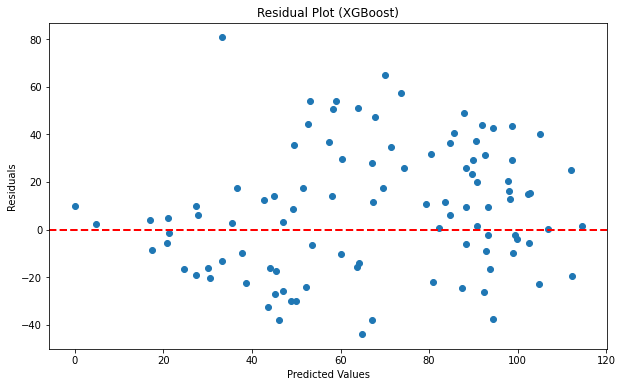

In [49]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = Y_test - Y_pred

# Step 5: Plot residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()